In [1]:
import numpy as np
from IPython.display import clear_output
from numpy.random import seed as seed
from numpy.random import rand as rand
import matplotlib.pyplot as plt
import math

import pla

In [2]:
seed()

In [3]:
n = 2000 #number of samples
delta = 0.01

messed  = True       
#messed = False 
mess_percent = 0.02
epochs = 1000

In [4]:
def display_w_2D(w, color):
    xrange = np.arange(0.0, 1.0, delta)
    yrange = np.arange(0.0, 1.0, delta)
    x1, x2 = np.meshgrid(xrange,yrange)

    F = w[0] + w[1] * x1 + w[2] * x2

    plt.contour(x1, x2, (F), [0], colors = color)

In [5]:
# generate a w_star, d = 2
def w_star_gen_2d():
    w_star = rand(3,1)
    while w_star[1,0] * w_star[2,0] == 0: # To ensure neither w1 nor w2 is zero to get an interesting w.
        w_star = rand(3,1)
    w_star[1,0] = w_star[1,0] * (-1)   # To ensure to have both +1 and -1 labels with good chance because all x1 >= 0 and x2 >= 0 
    w_star[0,0] = w_star[0,0] * min(abs(w_star[1,0]),abs(w_star[2,0])) # this is to ensure w_0/w_1 < 1 and w_0/w_2 < 1, so that the appropriate intercept can divide the data set into postive and negative samples
    #w_star[2,0] = 0
    
    return w_star

w_star: 
 [[ 0.21254323]
 [-0.6891139 ]
 [ 0.93795047]]


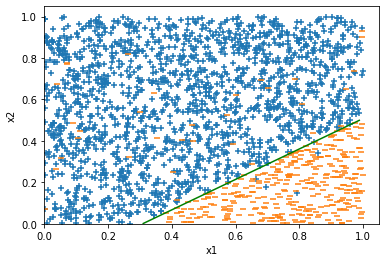

In [6]:
# n samples. Each sample includes: x0=1, x1, x2
x = rand(n,3) #* n
x[:,0] = 1

#The target weight vector the PLA is going to search for
w_star = w_star_gen_2d()
print('w_star: \n', w_star)


#create the label array
y = np.sign(x @ w_star)
for i in range(n):
    if y[i] == 0:
        x[i,2] = x[i,2] + 0.1 # adjust the sample to make sure the sample is not on the w_star line.
        y[i] = np.sign(x[i] @ w_star)


# ---------------------------------        
# mess up mess_percent of the samples to test pocket pla      
if messed: 
    for i in range(math.floor(n * mess_percent)):
        r = math.floor(rand()*n)
        y[r] = y[r] * (-1)
# ---------------------------------        

    
# separate + and - samples for plotting     
pos = np.empty([1,3])
neg = np.empty([1,3])
for i in range(n):
    if y[i] == 1:
        pos = np.insert(pos, 0, x[i], 0)
    else: 
        neg = np.insert(neg, 0, x[i], 0)
# delete the init/useless row which is on the bottom        
pos = np.delete(pos, -1, 0)
neg = np.delete(neg, -1, 0)


# display the data samples and the target classifier that PLA is tring to learn
plt.scatter(pos[:,1], pos[:,2], marker='+')
plt.scatter(neg[:,1], neg[:,2], marker='_')

display_w_2D(w_star, color = 'green')

plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

w:
 [[ 1.        ]
 [-3.41659104]
 [ 4.76592793]]


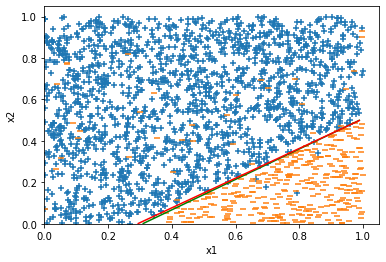

In [7]:
perceptron = pla.PLA()

if messed: 
    perceptron.fit(x[:,1:], y, pocket=True, epochs = epochs, degree = 1)
else: 
    perceptron.fit(x[:,1:], y, pocket=False)

print('w:\n', perceptron.w)



# display the data samples and the target classifier that PLA is tring to learn
plt.scatter(pos[:,1], pos[:,2], marker='+')
plt.scatter(neg[:,1], neg[:,2], marker='_')

display_w_2D(w_star, color = 'green')
display_w_2D(perceptron.w, color = 'red')

plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [8]:
print('misclassified counts:', perceptron.error(x[:,1:],y))
print('\n')

misclassified counts: 37


